In [4]:
from monoHbbtools import Load
from coffea import util

In [5]:
from monoHbbtools import Utilities

In [6]:
Utilities.get_timestamp()

'2023-10-19 18:52:34'

In [7]:
file = util.load("Zjetsnunu.coffea")
file

{'Z1Jets_Nu_Nu': {'Cutflow': {'Total_Events': 5315107,
   'ReducedEvents': 704110,
   'ak4bJetsTight': 4,
   'bbDiJets': 0},
  'Histograms': {'DiJet': Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double())}},
 'MET': {'Cutflow': {'Total_Events': 22985157,
   'ReducedEvents': 1366384,
   'ak4bJetsTight': 5578,
   'bbDiJets': 963},
  'Histograms': {'DiJet': Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 950.0 (963.0 with flow)}}}

In [8]:
Hist_List = [file["MET"]["Histograms"]["DiJet"], file["Z1Jets_Nu_Nu"]["Histograms"]["DiJet"] ]
Hist_List

[Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 950.0 (963.0 with flow),
 Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double())]

In [9]:
sorted(Hist_List, key = lambda x :  x.sum())

[Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()),
 Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 950.0 (963.0 with flow)]

In [10]:
import mplhep as hep
from coffea import util
import numpy as np
import matplotlib.pyplot as plt
from monoHbbtools.Utilities import get_timestamp

In [11]:
a = np.array([])
print(a)
b = np.append(a, 100)
print(b)

[]
[100.]


In [12]:
filename = "Zjetsnunu.coffea"
Output = util.load(filename)

def get_plotting_essentials(input_dict) :
    #Input is a dictionary

    #Sort the dictionary by Dijet integral
    #sorted_dict =  sorted(input_dict, key = )

    Hist_List = []
    Hist_sumlist = []
    Color_List = ["#4E3636","#116D6E","#321E1E"]
    label_List = []
    hist_index = []
    for key in input_dict.keys() :
        Hist_List.append(input_dict[key]["Histograms"]["DiJet"])
        print(Hist_List)
        Hist_sumlist.append(input_dict[key]["Histograms"]["DiJet"].sum())
        hist_index.append
        label_List.append(key)
    nHists = len(Hist_List)
    #sorted_histlist = sorted(Hist_List, key = lambda x :  x.sum(), reverse=True) # To sort the histograms in descending order of their integrals
    sorted_histlist = sorted(Hist_List, key = Hist_sumlist, reverse=True)
    #sorted_labellist = sorted(Hist_List, key = lambda x :  x.sum(), reverse=True) # To sort the histogram labels in descending order of their integrals
    sorted_labellist = sorted(label_List, key = Hist_sumlist, reverse=True)
    return sorted_histlist , sorted_labellist , Color_List, nHists

In [24]:
Hists = [(key, Output[key]["Histograms"]["DiJet"] ) for key in Output.keys()]
sorted_hists_tuple = sorted(Hists , key = lambda x : x[1].sum() , reverse=True)
sorted_hists = [i[1] for i in sorted_hists_tuple]
sorted_hists

[Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 950.0 (963.0 with flow),
 Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double())]

In [25]:
def get_plotting_essentials(Output) :
    color_list = ["#4E3636","#116D6E","#321E1E"]
    hist_tuple = [(key, Output[key]["Histograms"]["DiJet"] ) for key in Output.keys()]
    sorted_hist_tuple = sorted(hist_tuple , key = lambda x : x[1].sum() , reverse=True)
    sorted_hists = [i[1] for i in sorted_hist_tuple]
    sorted_labels = [i[0] for i in sorted_hist_tuple]
    color_list = color_list[:len(sorted_hists)]
    return sorted_hists, sorted_labels, color_list 

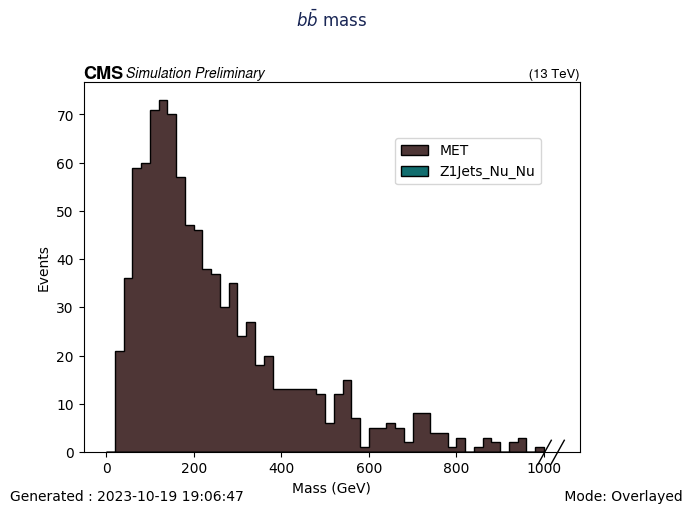

In [26]:
Hist_List , label_List , Color_List = get_plotting_essentials(Output)
fig, ax = plt.subplots()
hep.histplot(
    Hist_List,
    histtype="fill",
    color=Color_List,
    label=label_List,
    edgecolor="black",
    lw=1,
    ax=ax
    )
hep.cms.label("Preliminary", data= False)
ax.set_ylabel("Events")
ax.set_xlabel("Mass (GeV)")
ax.set_title(r"$b \bar{b}$ mass",pad=40, color="#192655")
fig.text(0.01,0.01,"Generated : "+get_timestamp(), fontsize = "10")
fig.text(0.87,0.01," Mode: Overlayed", fontsize = "10")
fig.legend(loc= (0.57,0.64))